# Classificação de roupas


<img src="img/CLASSIFICACAO_DE_ROUPAS_01.png">

<img src="img/CLASSIFICACAO_DE_ROUPAS_02.png">

# Etapa 1: Importação das bibliotecas

In [104]:
#%tensorflow_version 2.x   # para google colab

import tensorflow as tf
import pandas as pd
import numpy as np
import matplotlib.pyplot as plt
import seaborn as sns
import random
tf.__version__

'2.3.0'

# Etapa 2: Carregamento da base de dados

In [105]:
# para google colab
#from google.colab import drive
#drive.mount('/content/drive')

In [106]:
fashion_train_df = pd.read_csv('fashion-mnist-train.csv', sep = ',')
fashion_test_df = pd.read_csv('fashion-mnist-test.csv', sep = ',')

# Etapa 3: Visualização dos dados

In [107]:
# Classe está na coluna label
fashion_train_df.head()

,label,pixel1,pixel2,pixel3,pixel4,pixel5,pixel6,pixel7,pixel8,pixel9,...,pixel775,pixel776,pixel777,pixel778,pixel779,pixel780,pixel781,pixel782,pixel783,pixel784
0,2,0,0,0,0,0,0,0,0,0,...,0,0,0,0,0,0,0,0,0,0
1,9,0,0,0,0,0,0,0,0,0,...,0,0,0,0,0,0,0,0,0,0
2,6,0,0,0,0,0,0,0,5,0,...,0,0,0,30,43,0,0,0,0,0
3,0,0,0,0,1,2,0,0,0,0,...,3,0,0,0,0,1,0,0,0,0
4,3,0,0,0,0,0,0,0,0,0,...,0,0,0,0,0,0,0,0,0,0


In [108]:
fashion_train_df.tail()

,label,pixel1,pixel2,pixel3,pixel4,pixel5,pixel6,pixel7,pixel8,pixel9,...,pixel775,pixel776,pixel777,pixel778,pixel779,pixel780,pixel781,pixel782,pixel783,pixel784
59995,9,0,0,0,0,0,0,0,0,0,...,0,0,0,0,0,0,0,0,0,0
59996,1,0,0,0,0,0,0,0,0,0,...,73,0,0,0,0,0,0,0,0,0
59997,8,0,0,0,0,0,0,0,0,0,...,160,162,163,135,94,0,0,0,0,0
59998,8,0,0,0,0,0,0,0,0,0,...,0,0,0,0,0,0,0,0,0,0
59999,7,0,0,0,0,0,0,0,0,0,...,0,0,0,0,0,0,0,0,0,0


In [109]:
fashion_train_df.shape

(60000, 785)

In [110]:
training = np.array(fashion_train_df, dtype = 'float32')
testing = np.array(fashion_test_df, dtype='float32')

In [111]:
training

array([[2., 0., 0., ..., 0., 0., 0.],
       [9., 0., 0., ..., 0., 0., 0.],
       [6., 0., 0., ..., 0., 0., 0.],
       ...,
       [8., 0., 0., ..., 0., 0., 0.],
       [8., 0., 0., ..., 0., 0., 0.],
       [7., 0., 0., ..., 0., 0., 0.]], dtype=float32)

In [115]:
training.shape

(60000, 785)

0 => T-shirt/top
1 => Trouser
2 => Pullover
3 => Dress
4 => Coat
5 => Sandal
6 => Shirt
7 => Sneaker
8 => Bag
9 => Ankle boot

51770


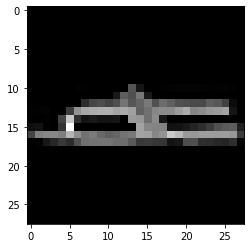

In [116]:
i = random.randint(1, 60000) # número randômico entre 1 e 60000  
print(i)
#plt.imshow(training[i,1:].reshape((28,28)))
plt.imshow(training[i,1:].reshape((28,28)), cmap='gray');

In [117]:
print('i = ', i)
label = training[i,0]
label

i =  51770


5.0

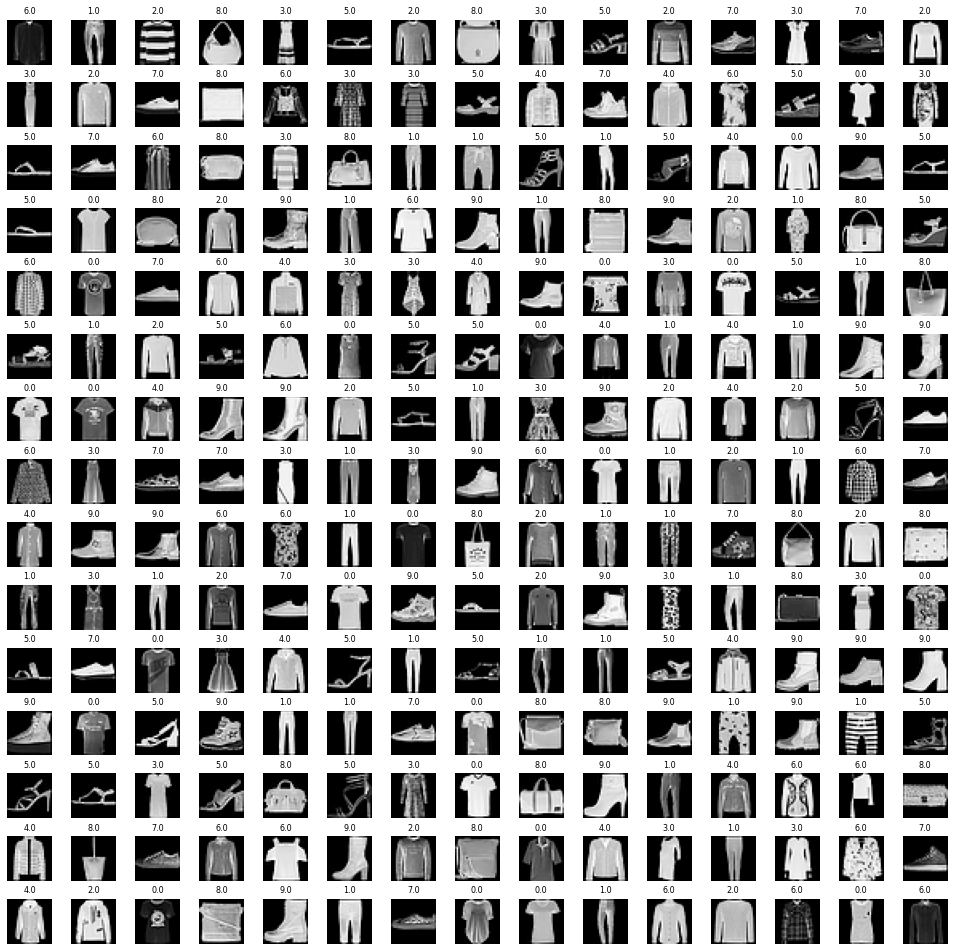

In [118]:
W_grid = 15
L_grid = 15
fig, axes = plt.subplots(L_grid, W_grid, figsize = (17,17))
axes = axes.ravel() # transforma um formato de matriz em um formato de vetor

n_training = len(training)

for i in np.arange(0, W_grid * L_grid):
  index = np.random.randint(0, n_training)
  axes[i].imshow(training[index,1:].reshape((28,28)), cmap='gray')
  axes[i].set_title(training[index,0], fontsize = 8)
  axes[i].axis('off') # retira o eixox e eixoy
plt.subplots_adjust(hspace=0.4)

In [48]:
n_training

60000

# Etapa 4: Tratamento da base de dados

In [39]:
X_train = training[:,1:] / 255
y_train = training[:,0]

In [40]:
X_test = testing[:,1:] / 255
y_test = testing[:,0]

In [41]:
X_train.shape

(60000, 784)

In [42]:
y_train.shape

(60000,)

In [43]:
X_train[0]

array([0.        , 0.        , 0.        , 0.        , 0.        ,
       0.        , 0.        , 0.        , 0.        , 0.        ,
       0.        , 0.        , 0.        , 0.        , 0.        ,
       0.        , 0.        , 0.        , 0.        , 0.        ,
       0.        , 0.        , 0.        , 0.        , 0.        ,
       0.        , 0.        , 0.        , 0.        , 0.        ,
       0.        , 0.        , 0.        , 0.        , 0.        ,
       0.        , 0.        , 0.        , 0.        , 0.        ,
       0.        , 0.        , 0.        , 0.        , 0.        ,
       0.        , 0.        , 0.        , 0.        , 0.        ,
       0.        , 0.        , 0.        , 0.        , 0.        ,
       0.        , 0.        , 0.        , 0.        , 0.        ,
       0.        , 0.        , 0.        , 0.        , 0.        ,
       0.        , 0.        , 0.        , 0.        , 0.        ,
       0.        , 0.        , 0.        , 0.        , 0.     

In [119]:
X_train = X_train.reshape(X_train.shape[0], *(28,28, 1)) # 28x28 e 1 canal por estar em escala de cinza, 
# pois estamos trabalhando com uma rede neural convolucional

X_test = X_test.reshape(X_test.shape[0], *(28,28, 1))

In [122]:
X_train.shape

(60000, 28, 28, 1)

In [125]:
X_test.shape[0]

10000

In [121]:
X_test.shape

(10000, 28, 28, 1)

# Etapa 5: Construção e treinamento do modelo

In [126]:
from tensorflow.keras import layers, models

cnn = models.Sequential()

# camada de convolução - Primeira Camada
# filters=32 significa que são 32 filtros
# kernel_size=(3,3) é a dimensão da matriz
# filters=32 elementos de tamanho kernel_size=(3,3)
cnn.add(layers.Conv2D(filters=32, kernel_size=(3,3), activation = 'relu', input_shape=(28,28,1)))

cnn.add(layers.MaxPooling2D(2,2))

cnn.add(layers.Conv2D(filters=64, kernel_size=(3,3), activation = 'relu'))
cnn.add(layers.MaxPooling2D(2,2))

#cnn.add(tf.keras.layers.Dropout(0.2))

cnn.add(layers.Conv2D(filters=64, kernel_size=(3,3), activation = 'relu'))

cnn.add(layers.Flatten())

cnn.add(layers.Dense(units=64, activation = 'relu'))

cnn.add(layers.Dense(units=10, activation = 'softmax'))

cnn.summary()

Model: "sequential_16"
_________________________________________________________________
Layer (type)                 Output Shape              Param #   
conv2d_47 (Conv2D)           (None, 26, 26, 32)        320       
_________________________________________________________________
max_pooling2d_29 (MaxPooling (None, 13, 13, 32)        0         
_________________________________________________________________
conv2d_48 (Conv2D)           (None, 11, 11, 64)        18496     
_________________________________________________________________
max_pooling2d_30 (MaxPooling (None, 5, 5, 64)          0         
_________________________________________________________________
conv2d_49 (Conv2D)           (None, 3, 3, 64)          36928     
_________________________________________________________________
flatten_14 (Flatten)         (None, 576)               0         
_________________________________________________________________
dense_28 (Dense)             (None, 64)              

In [127]:
# sparse_categorical_crossentropy pois os dados da classe não estão no forma One Hot Encoder
cnn.compile(loss = 'sparse_categorical_crossentropy', optimizer='Adam',
            metrics = ['accuracy'])

In [129]:
#epochs = 150
epochs = 3 # para teste

history = cnn.fit(X_train, y_train, batch_size = 512, epochs = epochs)

Epoch 1/3
118/118 [==============================] - 23s 198ms/step - loss: 0.5065 - accuracy: 0.8164
Epoch 2/3
118/118 [==============================] - 23s 192ms/step - loss: 0.4232 - accuracy: 0.8463
Epoch 3/3
118/118 [==============================] - 23s 193ms/step - loss: 0.3709 - accuracy: 0.8672


# Etapa 6: Avaliação do modelo

In [130]:
evaluation = cnn.evaluate(X_test, y_test)

313/313 [==============================] - 2s 7ms/step - loss: 0.3456 - accuracy: 0.8772


In [131]:
evaluation

[0.3455663323402405, 0.8772000074386597]

In [132]:
predicted_classes = cnn.predict_classes(X_test)

In [133]:
predicted_classes

array([0, 1, 2, ..., 8, 8, 6], dtype=int64)

In [134]:
y_test

array([0., 1., 2., ..., 8., 8., 1.], dtype=float32)

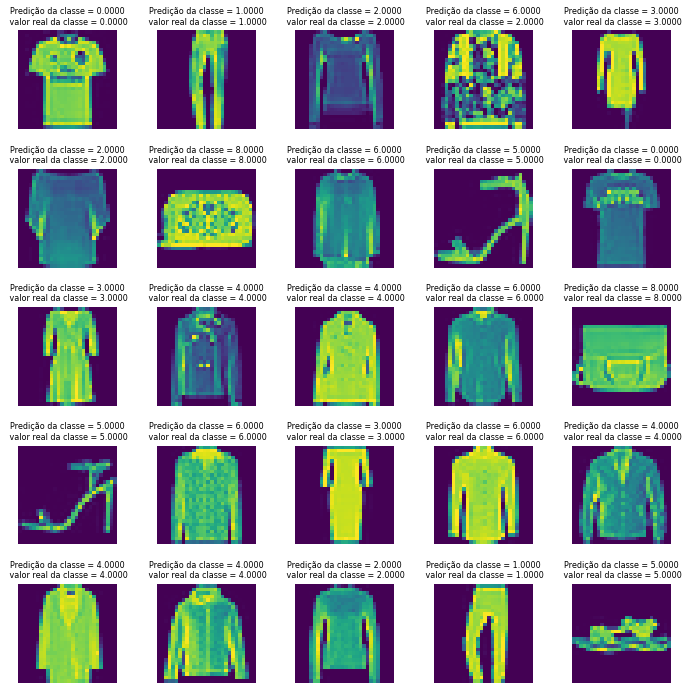

In [143]:
W_grid = 5
L_grid = 5
fig, axes = plt.subplots(L_grid, W_grid, figsize = (12,12))
axes = axes.ravel()

for i in np.arange(0, W_grid * L_grid):
  axes[i].imshow(X_test[i].reshape((28,28)))
  axes[i].set_title("Predição da classe = {:0.4f}\n valor real da classe = {:0.4f}".format(predicted_classes[i], y_test[i]), fontsize = 8)
  axes[i].axis('off')
plt.subplots_adjust(hspace=0.4)

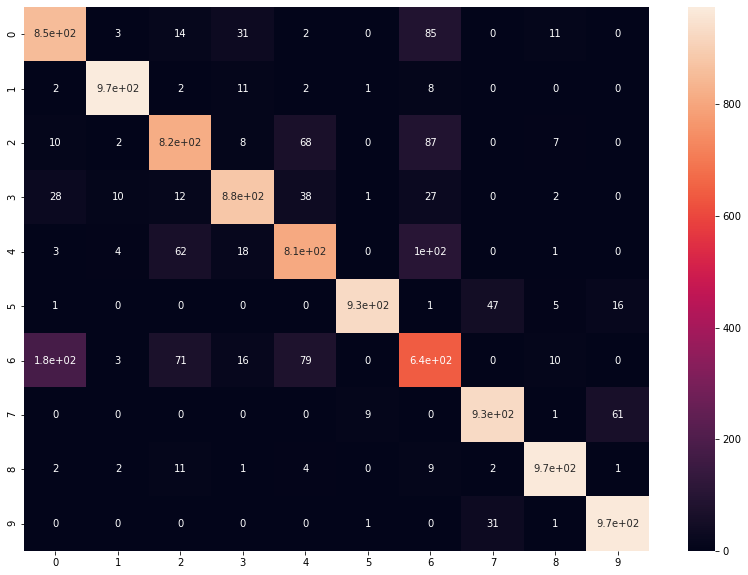

In [144]:
from sklearn.metrics import confusion_matrix
cm = confusion_matrix(y_test, predicted_classes)
plt.figure(figsize = (14,10))
sns.heatmap(cm, annot=True)

In [145]:
cm

array([[854,   3,  14,  31,   2,   0,  85,   0,  11,   0],
       [  2, 974,   2,  11,   2,   1,   8,   0,   0,   0],
       [ 10,   2, 818,   8,  68,   0,  87,   0,   7,   0],
       [ 28,  10,  12, 882,  38,   1,  27,   0,   2,   0],
       [  3,   4,  62,  18, 808,   0, 104,   0,   1,   0],
       [  1,   0,   0,   0,   0, 930,   1,  47,   5,  16],
       [179,   3,  71,  16,  79,   0, 642,   0,  10,   0],
       [  0,   0,   0,   0,   0,   9,   0, 929,   1,  61],
       [  2,   2,  11,   1,   4,   0,   9,   2, 968,   1],
       [  0,   0,   0,   0,   0,   1,   0,  31,   1, 967]], dtype=int64)

In [146]:
from sklearn.metrics import classification_report
num_classes = 10
target_names = ["Class {}".format(i) for i in range(num_classes)]
target_names

['Class 0',
 'Class 1',
 'Class 2',
 'Class 3',
 'Class 4',
 'Class 5',
 'Class 6',
 'Class 7',
 'Class 8',
 'Class 9']

In [147]:
print(classification_report(y_test, predicted_classes, target_names=target_names))

              precision    recall  f1-score   support

     Class 0       0.79      0.85      0.82      1000
     Class 1       0.98      0.97      0.97      1000
     Class 2       0.83      0.82      0.82      1000
     Class 3       0.91      0.88      0.90      1000
     Class 4       0.81      0.81      0.81      1000
     Class 5       0.99      0.93      0.96      1000
     Class 6       0.67      0.64      0.65      1000
     Class 7       0.92      0.93      0.92      1000
     Class 8       0.96      0.97      0.97      1000
     Class 9       0.93      0.97      0.95      1000

    accuracy                           0.88     10000
   macro avg       0.88      0.88      0.88     10000
weighted avg       0.88      0.88      0.88     10000

